## Day 34 Lecture 1 Assignment

In this assignment, we will learn about SVR. We will use the absenteeism at work dataset loaded below and analyze the model generated for this dataset.

In [1]:
%matplotlib inline

import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
absent = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/Absenteeism_at_work.csv', sep=';')

In [3]:
absent.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2


We previously used this dataset for KNN regression. Recall that we removed all correlated columns as well as columns that are a function of two or more other columns (like BMI and weight and height) as well as columns that are not useful to us (like ID).
We also created dummy variables for the categorical columns in our dataset.
Finally, we split the data into test and train (with test being 20% of the data).

Perform these actions below.

In [4]:
#answer below:
#choosing the which columns for features
absent2 = absent[['Absenteeism time in hours', 'Seasons', 'Distance from Residence to Work', 'Day of the week',
                  'Son', 'Transportation expense', 'Disciplinary failure', 'Age', 'Work load Average/day ', 'Social smoker',
                  'Hit target', 'Social drinker', 'Pet']]

In [5]:
#change Seasons, Day of the Week and Son to dummy
season = pd.get_dummies(absent2['Seasons'], drop_first=True)
day = pd.get_dummies(absent2['Day of the week'], drop_first=True)
child = pd.get_dummies(absent2['Son'], drop_first=True)
hit = pd.get_dummies(absent2['Hit target'], drop_first=True)

In [6]:
absent2 = pd.concat([absent2, season, day, child, hit], axis=1)
absent2 = absent2.drop(['Seasons', 'Day of the week', 'Son', 'Hit target'], axis=1)
absent2.head()

,Absenteeism time in hours,Distance from Residence to Work,Transportation expense,Disciplinary failure,Age,Work load Average/day,Social smoker,Social drinker,Pet,2,3,4,3,4,5,6,1,2,3,4,87,88,91,92,93,94,95,96,97,98,99,100
0,4,36,289,0,33,239.554,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,13,118,1,50,239.554,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,2,51,179,0,38,239.554,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,4,5,279,0,39,239.554,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,2,36,289,0,33,239.554,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [7]:
#splitting data
from sklearn.model_selection import train_test_split
X = absent2.drop(['Absenteeism time in hours'], axis=1)
y = absent2['Absenteeism time in hours']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Scale the independent variables using the standard scaler

In [8]:
# answer below:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()

X_train_scale = scale.fit_transform(X_train)
X_test_scale = scale.transform(X_test)

Generate an SVR model to predict the number of hours of absenteeism. Compare the train and test scores.

In [9]:
# answer below:
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score
#setting kernel to linear and using all other default parameters to see intial scores
svm = SVR(kernel='linear', C=1.0, epsilon=0.1)
svm.fit(X_train_scale, y_train)

print('Train score:', svm.score(X_train_scale, y_train))
print('Test score:', svm.score(X_test_scale, y_test))

Train score: 0.008208660690134595
Test score: -0.022434729009436882


If you are unhappy with your model's performance, perform a grid search to optimize C. You may also want to compare something other than R squared, like MSE, and could try some other kernels than just linear.

In [10]:
# answer below:
from sklearn.model_selection import GridSearchCV
params = {'C': [.01, .1, 1.0, 10, 100], 'kernel': ['poly', 'linear', 'rbf'], 'gamma': ['scale', 'auto'], 
          'epsilon': [0.1, 1, 10]} 
svr = SVR()
svr_grid = GridSearchCV(svr, param_grid=params, cv=5)
svr_grid.fit(X_train_scale, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1.0, 10, 100],
                         'epsilon': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['poly', 'linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [11]:
#best parameters
print('Best C:', svr_grid.best_estimator_.C)
print('Best kernel:', svr_grid.best_estimator_.kernel)
print('Best gamma:', svr_grid.best_estimator_.gamma)
print('Best epsilon:', svr_grid.best_estimator_.epsilon)

Best C: 10
Best kernel: rbf
Best gamma: auto
Best epsilon: 1


Create a homoscedasticity (residual) plot. Look back at your KNN regression exercise (Day 32 Lecture 1). How do your model results compare?

In [16]:
from sklearn.metrics import mean_squared_error
svr = SVR(kernel='rbf', gamma='auto', C=10, epsilon=1)
svr.fit(X_train_scale, y_train)
r2_train = svr.score(X_train_scale, y_train)
r2_test = svr.score(X_test_scale, y_test)
rmse_train = mean_squared_error(y_train, svr.predict(X_train_scale), squared=False)
rmse_test = mean_squared_error(y_test, svr.predict(X_test_scale), squared=False)

print('Best train scores\nR2: {:.5f}\tRMSE: {:.5f}'.format(r2_train, rmse_train))
print('\nBest test scores\nR2: {:.5f}\tRMSE: {:.5f}'.format(r2_test, rmse_test))

Best train scores
R2: 0.12978	RMSE: 12.43082

Best test scores
R2: 0.00635	RMSE: 13.26363


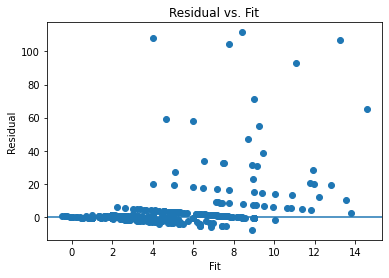

In [17]:
# answer below:
#residual plot
pred_train = svr.predict(X_train_scale)
res = y_train - pred_train
plt.scatter(pred_train, res)
plt.xlabel('Fit')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Fit')
plt.show()

Comparing these results to the previous ones from KNN model it seems that more of the data is on the line with very few underneath but sporadic outliers above the y=0 line. I did include 2 new features for this model, so maybe this is the cause. Overall it looks like this SVR model better suits the data.